In [67]:
# Safaa Amer
# GW Analytics Bootcampe
# Homework 6 

In [78]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import openweathermapy.core as ow
from citipy import citipy
from collections import OrderedDict



In [71]:
# Generate 500 random numbers for longitude and latitude
#Latitude measurements range from 0° to (+/–)90°
#Longitude measures how far east or west of the prime meridian a place is located. 
#The prime meridian runs through Greenwich, England
#Longitude measurements range from 0° to (+/–)180°.

#array of 100 random numbers from [-90, 90):

randlat= 180 * np.random.random_sample((600, 1)) - 90 # 600 random number for latitude
randlong= 360 * np.random.random_sample((600,1)) - 180 # 600 random number for longitude
coordinates = np.c_[randlat, randlong]
coordinates


array([[ -75.7354375 ,   33.73166934],
       [  -7.29747325,   -7.69145661],
       [  52.52774967,  175.70262573],
       ..., 
       [ -36.70759022,  -76.19484137],
       [  22.33008972,   10.20419821],
       [  71.94817931, -123.99041239]])

In [83]:
# identify nearest cities to the random pairs of latitude and longitude from citipy
# skip coordinates which do not correspond to a city
cities = []
for coordinate_pair in coordinates:
    randlat, randlong = coordinate_pair
    cities.append(citipy.nearest_city(randlat, randlong))

name_of_city =[]
country_code =[]
try:
    for city in cities:
        country_code.append(city.country_code)
        name_of_city.append(city.city_name)
except Exception:
    pass

OrderedDict((X, True) for X in name_of_city).keys() # to remove duplicates while keeping order
name_of_city = np.asarray(name_of_city) #convert list into array
name_of_city


array(['port elizabeth', 'georgetown', 'nikolskoye', 'busselton',
       'taolanaro', 'poum', 'dikson', 'sura', 'ushuaia', 'hermanus',
       'orocue', 'khani', 'busselton', 'raposa', 'barentsburg',
       'mitsamiouli', 'maryville', 'airai', 'barrow', 'rikitea',
       'esperance', 'vaini', 'yerofey pavlovich', 'carnarvon', 'saldanha',
       'ponta do sol', 'fort nelson', 'narsaq', 'atuona', 'ushuaia',
       'yellowknife', 'esperance', 'bethel', 'blackwater', 'chokurdakh',
       'tumannyy', 'hithadhoo', 'pangnirtung', 'punta arenas',
       'punta arenas', 'marabba', 'alofi', 'kandrian', 'belushya guba',
       'vaini', 'lompoc', 'puerto ayora', 'ostrovnoy', 'santa isabel',
       'tromso', 'otorohanga', 'okhotsk', 'kitakami', 'kaitangata',
       'atuona', 'bryan', 'jamestown', 'parana', 'ellon', 'atuona',
       'ushuaia', 'kidal', 'cape town', 'puerto escondido', 'novopokrovka',
       'mys shmidta', 'bredasdorp', 'nagato', 'hualmay', 'rikitea',
       'tuatapere', 'tasiilaq', '

In [86]:

# Extract Information of the targeted cities
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
settings = {"units": "metric", "appid": api_key}

try:
    name_of_city = [city[0] for city in name_of_city]
    weather_city = [ow.get_current(city, **settings) for city in name_of_city]
    summary = ["name", "coord.lon", "coord.lat", "main.temp", "main.humidity", "clouds.all", "wind.speed"]
    data = [response(*summary) for response in weather_city]
    
except Exception:
    pass
    
weather_df = pd.DataFrame(data, index = name, columns = ['City_Name', 'Longitude', 'Latitude', 'temperature', 'Humidity', 'Cloudiness', 'Wind_Speed'], copy=False)

weather_df.to_csv(Weather_world, encoding='utf-8')

weather_df.head()


ValueError: Shape of passed values is (7, 2), indices imply (7, 500)

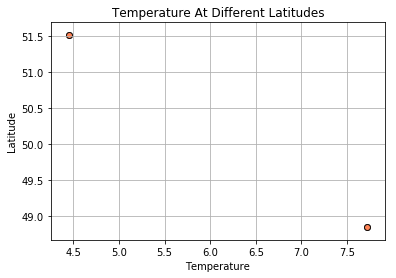

In [88]:
# Scatter plot for temperature vs Latitude
plt.scatter(weather_df.temperature, 
            weather_df.Latitude, 
            c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Temperature At Different Latitudes")
plt.ylabel("Latitude")
plt.xlabel("Temperature")
plt.grid(True)


# Save Figure
plt.savefig("analysis/Fig1.png")

# Show plot
plt.show()

In [ ]:
# Scatter plot for Humidity vs Latitude
plt.scatter(weather_df.humidity, 
            weather_df.Latitude, 
            c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Humidity At Different Latitudes")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid(True)


# Save Figure
plt.savefig("analysis/Fig2.png")

# Show plot
plt.show()

In [ ]:
# Scatter plot for Cloudiness vs Latitude
plt.scatter(weather_df.Cloudiness, 
            weather_df.Latitude, 
            c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Cloudiness (%) At Different Latitudes")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)


# Save Figure
plt.savefig("analysis/Fig3.png")

# Show plot
plt.show()

In [ ]:
# Scatter plot for Wind Speed (mph) vs Latitude
plt.scatter(weather_df.Wind_speed, 
            weather_df.Latitude, 
            c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Wind Speed (mph) At Different Latitudes")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)


# Save Figure
plt.savefig("analysis/Fig4.png")

# Show plot
plt.show()